In [ ]:
#first we will divide the ones that bring the most passengers into groups
# secondly, we will group the ones with the most flights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',100)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
#select markown 
#click edit----> and select insert image

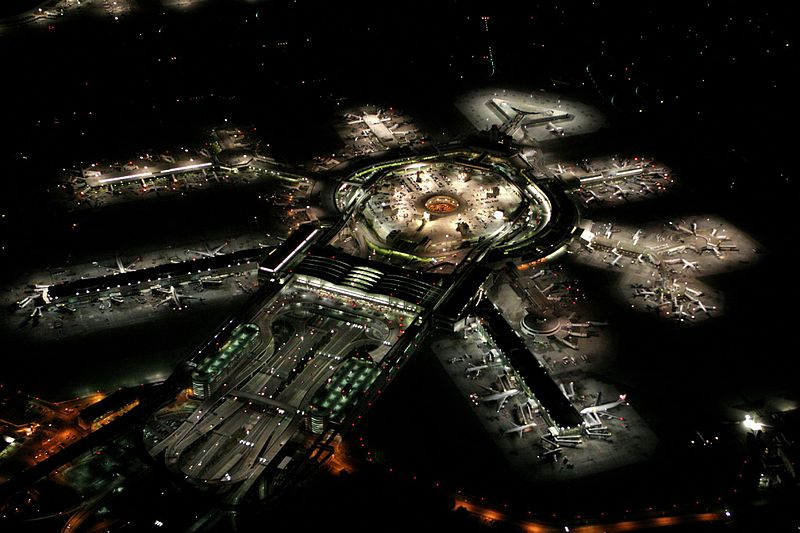 

# READ THE DATA

In [3]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

# EXPLORATORY DATA ANALYSİS

In [4]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [5]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [7]:
df['Operating Airline'].value_counts()

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

In [10]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
17849,201712,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Enplaned,Other,International,A,8869
18452,201804,EVA Airways,BR,EVA Airways,BR,International,Asia,Enplaned,Other,International,G,19476
3018,200709,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Enplaned,Other,International,A,3475
10155,201210,Hawaiian Airlines,HA,Hawaiian Airlines,HA,Domestic,US,Enplaned,Other,International,A,8602
15777,201609,Turkish Airlines,TK,Turkish Airlines,TK,International,Europe,Deplaned,Other,International,G,8665


# DATA VİSUALİZATİON

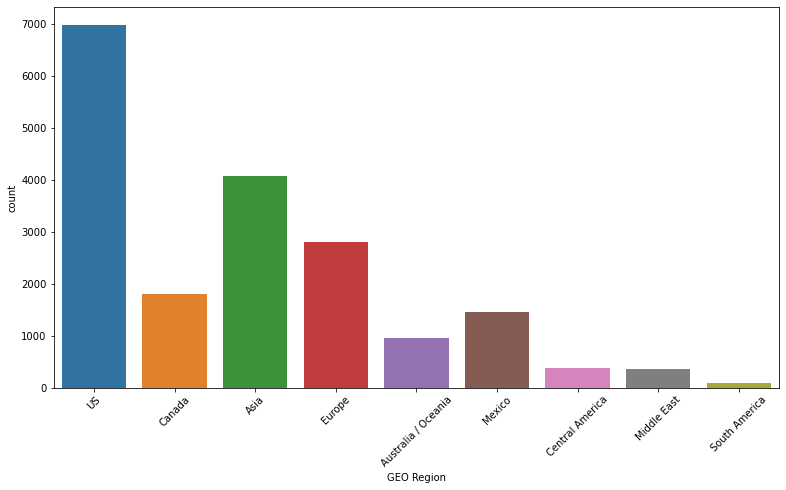

In [12]:
plt.figure(figsize=(13,7))
sns.countplot(df['GEO Region'])
plt.xticks(rotation=45);

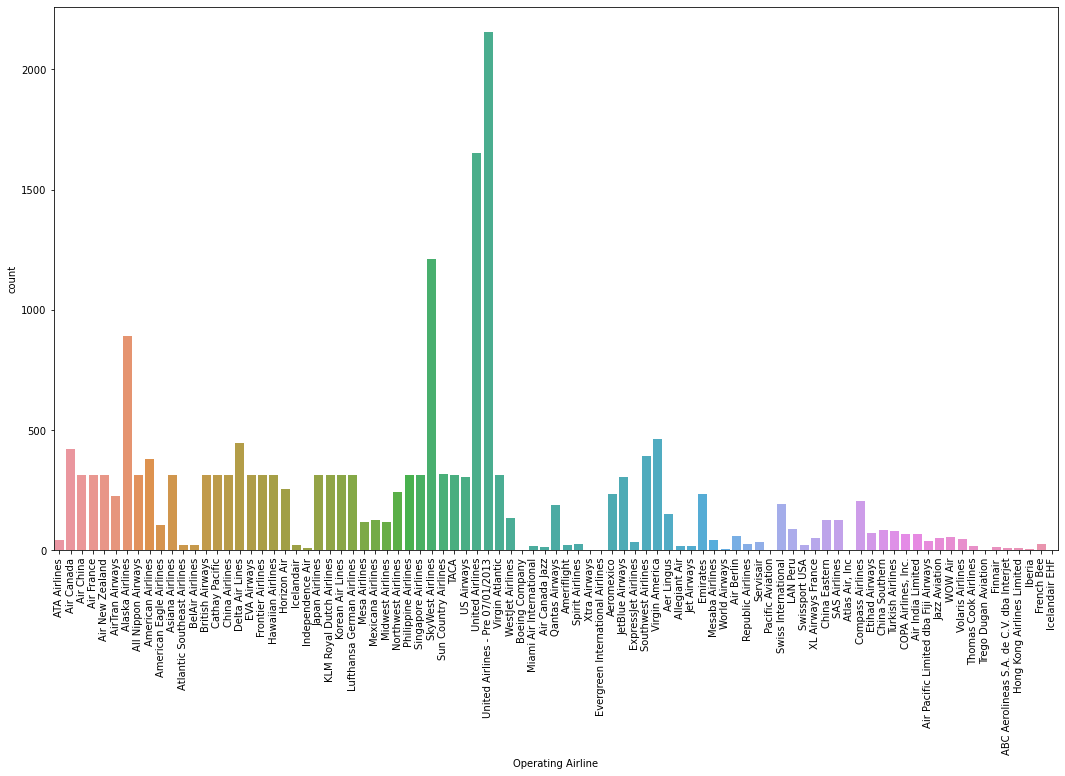

In [20]:
plt.figure(figsize=(18,10))
sns.countplot(df['Operating Airline'])
plt.xticks(rotation=90);

# FİRST STEP PREPARATİON

In [26]:
a=df[['Passenger Count','Operating Airline']]

In [30]:
a.head()

,Passenger Count,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways
0,27271,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29131,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5415,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35156,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,34090,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
a.isnull().sum()

Passenger Count      0
Operating Airline    0
dtype: int64

In [31]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 89 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   Passenger Count                                         18885 non-null  int64
 1   Operating Airline_ATA Airlines                          18885 non-null  uint8
 2   Operating Airline_Aer Lingus                            18885 non-null  uint8
 3   Operating Airline_Aeromexico                            18885 non-null  uint8
 4   Operating Airline_Air Berlin                            18885 non-null  uint8
 5   Operating Airline_Air Canada                            18885 non-null  uint8
 6   Operating Airline_Air Canada Jazz                       18885 non-null  uint8
 7   Operating Airline_Air China                             18885 non-null  uint8
 8   Operating Airline_Air France                            

In [29]:
a=pd.get_dummies(a,drop_first=True)

# CLUSTERİNG 1

In [32]:
model=KMeans(n_clusters=4)

In [33]:
model=model.fit(a)

In [34]:
pred=model.predict(a)

In [35]:
pred

array([3, 3, 3, ..., 3, 3, 3])

In [36]:
a.head()

,Passenger Count,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways
0,27271,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29131,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5415,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35156,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,34090,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
silhouette_score(a,pred)

0.7861526628782762

In [38]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(a)
        pred=model.predict(a)
        score=silhouette_score(a,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))

In [39]:
clust=a.assign(Cluıster=model.labels_)
model.cluster_centers_.astype('int')#merkeszi belirliyor
model.labels_

array([3, 3, 3, ..., 3, 3, 3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


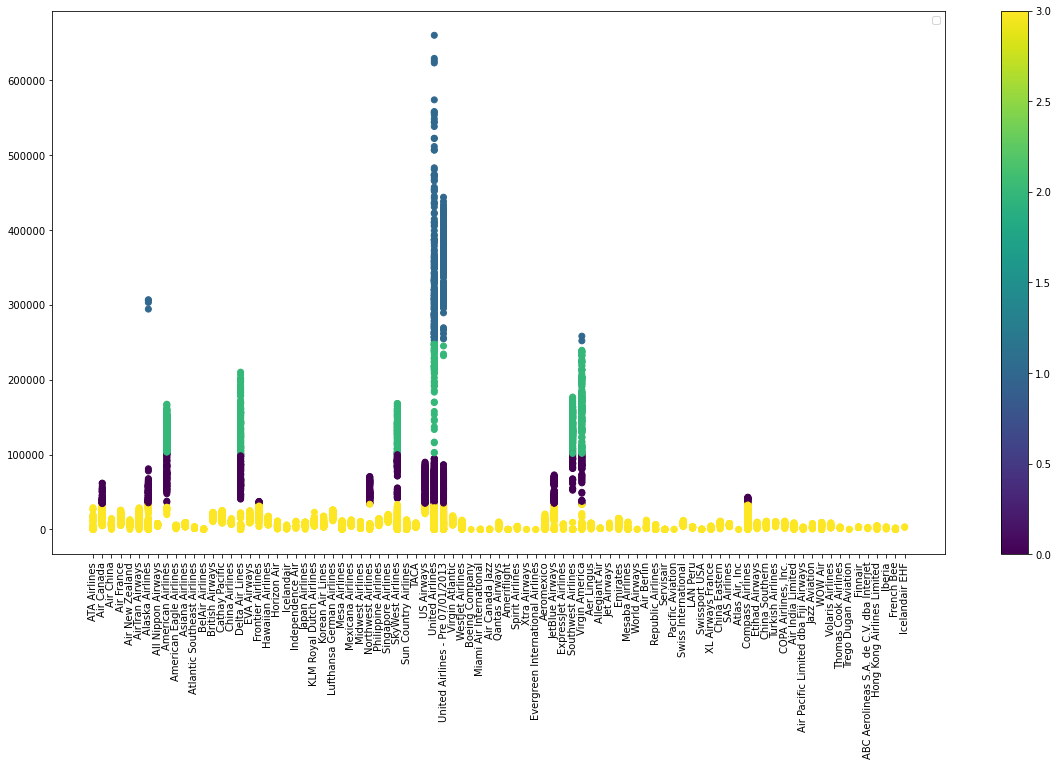

In [69]:
plt.figure(figsize=(20,10))
plt.scatter(x=df['Operating Airline'],y=df['Passenger Count'],c=pred)
plt.legend()
plt.colorbar()
plt.xticks(rotation=90)
plt.show()

In [41]:
allscore=[]
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
            no_of_cluster+=1
            model=KMeans(n_clusters=no_of_cluster)
            #model=model.fit()
            pred=model.fit_predict(a)
            score=silhouette_score(a,pred)
            print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
            allscore.append(score)
            allclusters.append(no_of_cluster)
        
clust(10)

Number of cluster 2, silhouette 0.8596461994724434
Number of cluster 3, silhouette 0.8285981426221459
Number of cluster 4, silhouette 0.7861526628782762
Number of cluster 5, silhouette 0.7846348284801813
Number of cluster 6, silhouette 0.6615034562361216
Number of cluster 7, silhouette 0.6621082420550476
Number of cluster 8, silhouette 0.6444315682091396
Number of cluster 9, silhouette 0.6385892655829005
Number of cluster 10, silhouette 0.6142278913005803


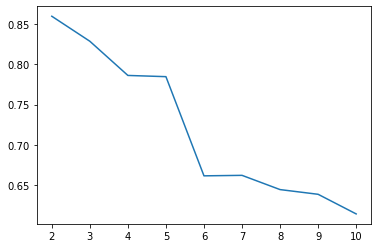

In [42]:
plt.plot(allclusters,allscore)

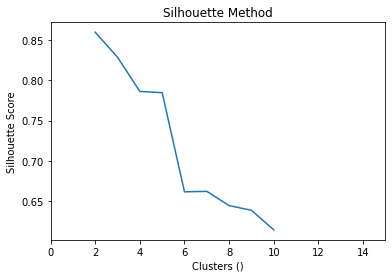

In [43]:
#Ploting the silhoutte method
plt.plot(allclusters,allscore)
plt.xlabel('Clusters ()')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

In [45]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
            no_of_cluster+=1
            model=KMeans(n_clusters=no_of_cluster)
            #model=model.fit()
            pred=model.fit_predict(a)
            sum_of_squared_distances.append(model.inertia_)
            score=silhouette_score(a,pred)
            print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
            allscore.append(score)
            allclusters.append(no_of_cluster)
        
clust(9)

Number of cluster 2, silhouette 0.8596461994724434
Number of cluster 3, silhouette 0.8285981426221459
Number of cluster 4, silhouette 0.7861526628782762
Number of cluster 5, silhouette 0.7845621422268281
Number of cluster 6, silhouette 0.6615045739621999
Number of cluster 7, silhouette 0.6613551226294259
Number of cluster 8, silhouette 0.6453662142886446
Number of cluster 9, silhouette 0.6372171107514105


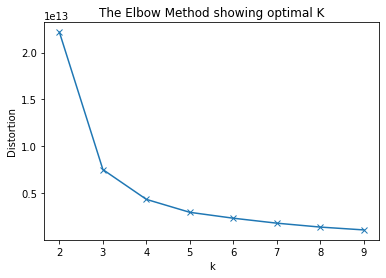

In [46]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

In [79]:
# SECOND STEP PREPARATİON

In [47]:
b=df[['Activity Period','Operating Airline']]

In [48]:
b.head()

,Activity Period,Operating Airline
0,200507,ATA Airlines
1,200507,ATA Airlines
2,200507,ATA Airlines
3,200507,Air Canada
4,200507,Air Canada


In [51]:
b.isnull().sum()

Activity Period      0
Operating Airline    0
dtype: int64

In [52]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Activity Period    18885 non-null  int64 
 1   Operating Airline  18885 non-null  object
dtypes: int64(1), object(1)
memory usage: 295.2+ KB


In [53]:
b=pd.get_dummies(b,drop_first=True)

# CLUSTERİNG 2

In [54]:
model2=KMeans(n_clusters=4)

In [55]:
model2=model.fit(b)

In [56]:
pred2=model.predict(b)

In [57]:
pred2

array([1, 1, 1, ..., 2, 2, 2])

In [58]:
b.head()

,Activity Period,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways
0,200507,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,200507,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,200507,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,200507,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,200507,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
silhouette_score(b,pred2)

0.6110489630845438

In [60]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(b)
        pred2=model.predict(b)
        score=silhouette_score(b,pred2)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))

In [61]:
clust=b.assign(Cluıster=model.labels_)
model.cluster_centers_.astype('int')#merkeszi belirliyor
model.labels_

array([1, 1, 1, ..., 2, 2, 2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


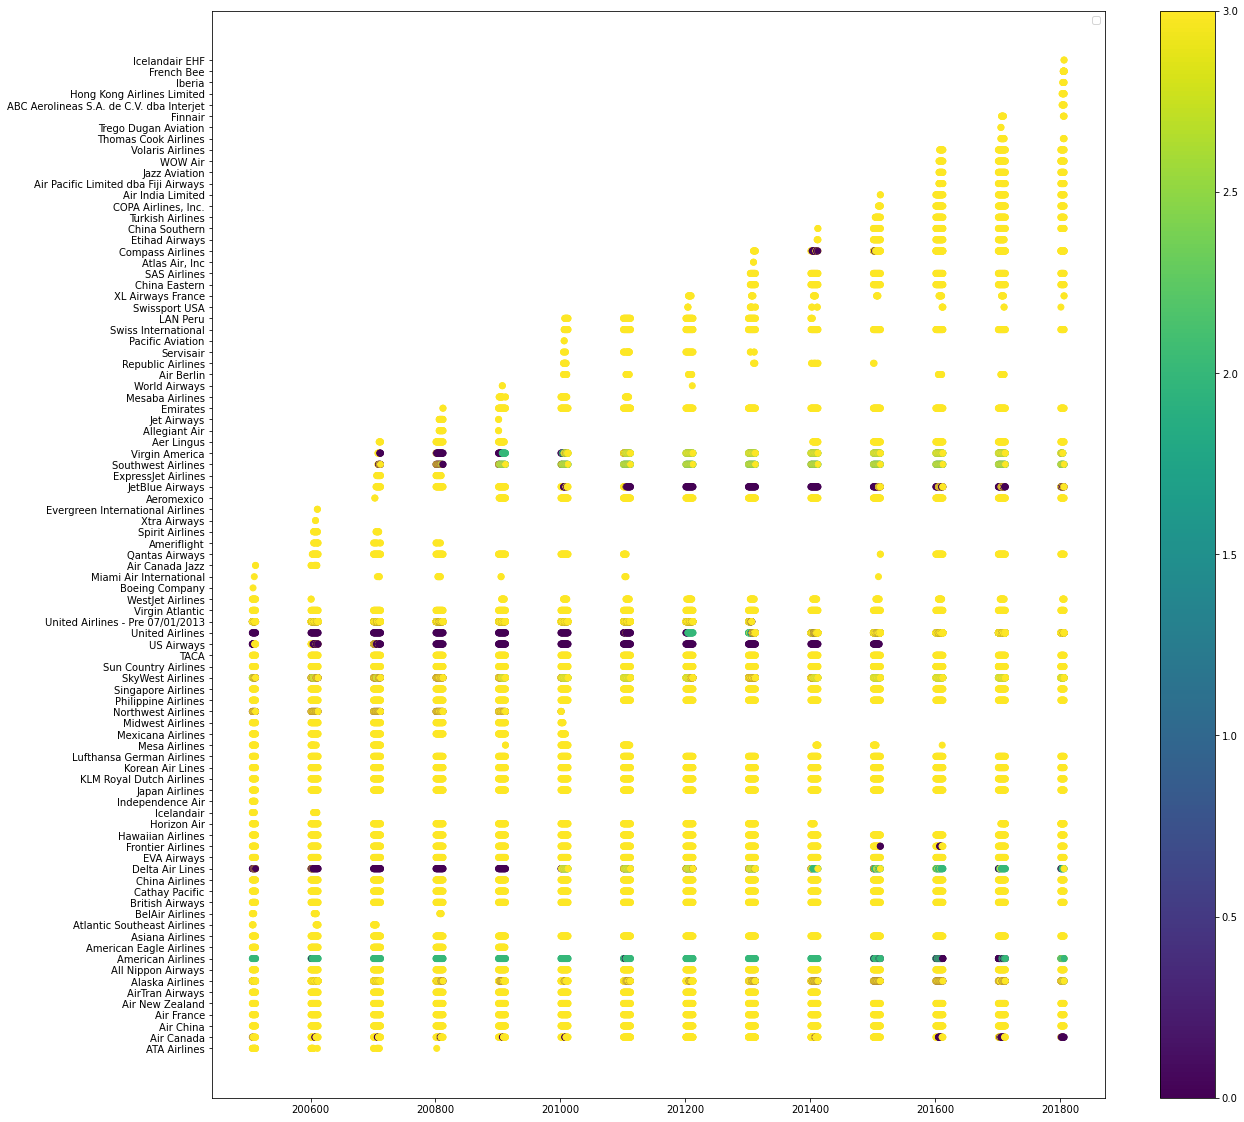

In [63]:
plt.figure(figsize=(20,20))
plt.scatter(x=df['Activity Period'],y=df['Operating Airline'],c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [70]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
            no_of_cluster+=1
            model=KMeans(n_clusters=no_of_cluster)
            #model=model.fit()
            pred2=model.fit_predict(b)
            sum_of_squared_distances.append(model.inertia_)
            score=silhouette_score(b,pred2)
            print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
            allscore.append(score)
            allclusters.append(no_of_cluster)
        
clust(9)

Number of cluster 2, silhouette 0.6402182233432152
Number of cluster 3, silhouette 0.6116946847896633
Number of cluster 4, silhouette 0.6110489630845438
Number of cluster 5, silhouette 0.612079406140555
Number of cluster 6, silhouette 0.6456168173855805
Number of cluster 7, silhouette 0.6697464126195927
Number of cluster 8, silhouette 0.6954782818254764
Number of cluster 9, silhouette 0.6948202379225041


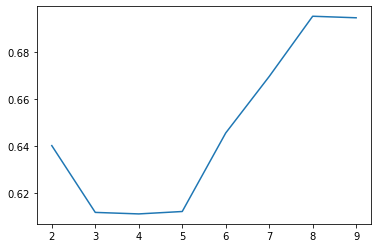

In [71]:
plt.plot(allclusters,allscore)

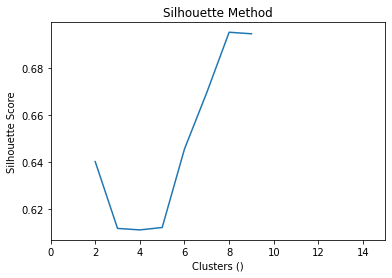

In [72]:
#Ploting the silhoutte method
plt.plot(allclusters,allscore)
plt.xlabel('Clusters ()')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

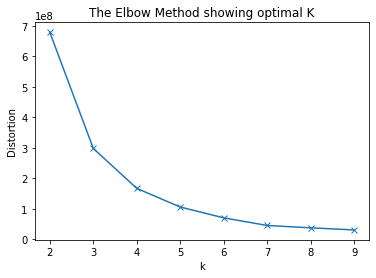

In [75]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

In [76]:
b.head()

,Activity Period,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways
0,200507,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,200507,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,200507,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,200507,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,200507,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
